# Modelo de Machine Learning para prever o dignóstico de diabetes 

## Objetivo: Atingir uma acurácia do modelo de no mínimo 70% para prever se um paciente terá ou não diabetes

### Base de dados do repositório do Kaggle 

### Aprendizagem supervisionada com modelagem de classificação

In [1]:
# Importando os modulos 
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Carregando o dataset
dados = pd.read_csv("pima-data.csv")

In [3]:
# Verificando númro de linhas e colunas
dados.shape

(768, 10)

In [4]:
# Amostra das primeiras linhas do dataset
dados.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
# Amostra das últimas linhas do dataset
dados.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [6]:
# Verificando se há valores nulos
dados.isnull().values.any()

False

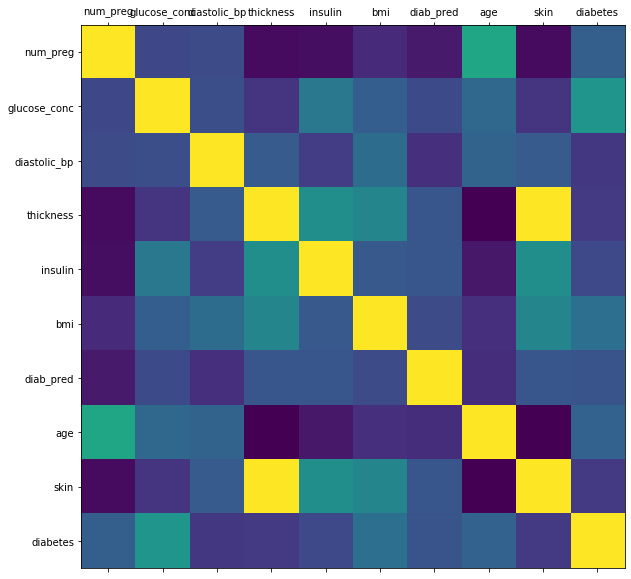

In [7]:
# Identificando a correlação entre os dados por meio de um gráfico de calor 
def plot_corr(dados, size=10):
    corr = dados.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(dados)

In [8]:
# Transformando os valores da coluna 'diabetes' em int
diabetes_change = {True: 1, False: 0}

In [9]:
# Aplicando a transformação
dados["diabetes"] = dados["diabetes"].map(diabetes_change)

In [10]:
# Amostra dos dados
dados.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [11]:
# Verificando a distribuição dos dados em termos de Verdadeiros ou Falsos 
num_true = len(dados.loc[dados["diabetes"] == True])
num_false = len(dados.loc[dados["diabetes"]== False])
por_true = (num_true / (num_false + num_true) * 100)
por_false = (num_false / (num_false + num_true)  * 100)
print("Número de Casos Verdadeiros: {0} ({1:2.2f}%)".format(num_true, por_true))
print("Número de casos falsos {0} ({1:2.2f}%)".format(num_false, por_false ))

Número de Casos Verdadeiros: 268 (34.90%)
Número de casos falsos 500 (65.10%)


## Spliting 
### Dividindo em 70% para dados de treino e 30% para dados de teste

In [12]:
# Importando o ScikitLearn
import sklearn as sk
from sklearn.model_selection import train_test_split

In [13]:
# Seleção das variáveis preditoras (Feature Selection)
atributos = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']

In [14]:
# Seleção da variável a ser prevista (target)
target = ['diabetes']

In [15]:
# Criando os objetos
X = dados[atributos].values
Y = dados[target].values

In [16]:
# Definindo a taxa de teste
split_test_size = 0.30

In [17]:
# Criando os dados de treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)
print("Dados de treino: {0:0.2f}%". format((len(X_treino)/len(dados.index)) * 100))
print("Dados de teste: {0:0.2f}%".format((len(X_teste)/len(dados.index)) * 100))

Dados de treino: 69.92%
Dados de teste: 30.08%


## Verificando o Split

In [18]:
print("Original True: {0} ({1:1.2f}%)".format(len(dados.loc[dados["diabetes"] == 1]),
                                             (len(dados.loc[dados["diabetes"] == 1])/len(dados.index) * 100)))
print("Original False: {0} ({1:1.2f}%)".format(len(dados.loc[dados["diabetes"] == 0]),
                                             (len(dados.loc[dados["diabetes"] == 0])/len(dados.index) * 100)))
print("")
print("Training True: {0} ({1:1.2f}%)".format(len(Y_treino[Y_treino[:] == 1]),
                                             (len(Y_treino[Y_treino[:] == 1])/len(Y_treino) * 100)))
print("Training False: {0} ({1:1.2f}%)".format(len(Y_treino[Y_treino[:] == 0]),
                                             (len(Y_treino[Y_treino[:] == 0])/len(Y_treino) * 100)))
print("")
print("Test True: {0} ({1:1.2f}%)".format(len(Y_teste[Y_teste[:] == 1]),
                                         len(Y_teste[Y_teste[:] == 1])/len(Y_teste) * 100))
print("Test False: {0} ({1:1.2f}%)".format(len(Y_teste[Y_teste[:] == 0]),
                                         len(Y_teste[Y_teste[:] == 0])/len(Y_teste) * 100))

Original True: 268 (34.90%)
Original False: 500 (65.10%)

Training True: 188 (35.01%)
Training False: 349 (64.99%)

Test True: 80 (34.63%)
Test False: 151 (65.37%)


## Valores Missing Ocultos

In [19]:
# Nesta fase vamos eliminar os valores preenchidos com zeros em nosso database pois eles podem comprometer a previsão 
# Amostra dos dados
dados.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [20]:
# Quantidade de zeros presentes em cada coluna
print("Linhas no dataframe: {0}".format(len(dados)))
print("Zeros na coluna glucose_conc: {0}".format(len(dados.loc[dados["glucose_conc"] == 0])))
print("Zeros na coluna diastolic_bp: {0}".format(len(dados.loc[dados["diastolic_bp"] == 0])))
print("Zeros na coluna thickness: {0}".format(len(dados.loc[dados["thickness"] == 0])))
print("Zeros na coluna insulin: {0}".format(len(dados.loc[dados["thickness"] == 0])))
print("Zeros na coluna bmi: {0}".format(len(dados.loc[dados["bmi"] == 0])))
print("Zeros na coluna age: {0}".format(len(dados.loc[dados["age"] == 0])))

Linhas no dataframe: 768
Zeros na coluna glucose_conc: 5
Zeros na coluna diastolic_bp: 35
Zeros na coluna thickness: 227
Zeros na coluna insulin: 227
Zeros na coluna bmi: 11
Zeros na coluna age: 0


## Tratando os Dados Missing 

In [21]:
#Importando o módulo Imputer do ScikitLearn
from sklearn.impute import SimpleImputer

In [22]:
# Criando o objeto para substituir os valores zeros pela média da coluna
subs_zero = SimpleImputer(missing_values = 0, strategy = "mean")

# Substituindo os valores zeros
X_treino = subs_zero.fit_transform(X_treino)
X_teste = subs_zero.fit_transform(X_teste)

X_treino

array([[  1.        ,  95.        ,  60.        , ...,  23.9       ,
          0.26      ,  22.        ],
       [  5.        , 105.        ,  72.        , ...,  36.9       ,
          0.159     ,  28.        ],
       [  4.34056399, 135.        ,  68.        , ...,  42.3       ,
          0.365     ,  24.        ],
       ...,
       [ 10.        , 101.        ,  86.        , ...,  45.6       ,
          1.136     ,  38.        ],
       [  4.34056399, 141.        ,  72.24131274, ...,  42.4       ,
          0.205     ,  29.        ],
       [  4.34056399, 125.        ,  96.        , ...,  22.5       ,
          0.262     ,  21.        ]])

## Construindo, treinando e verificando a acurácia do modelo 1

In [23]:
# Para o modelo 1 vamos utilizar o algoritmo Naive Bayes com o GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [24]:
# Criando o modelo preditivo
modelo_1 = GaussianNB()

In [25]:
# Treinando o modelo
modelo_1.fit(X_treino, Y_treino.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
# Verificando a exatidão do modelo
predict_test = modelo_1.predict(X_teste)
print("Exatidão: {0:4f}".format(metrics.accuracy_score(Y_teste, predict_test)))

Exatidão: 0.735931


## Testando modelo 2

In [27]:
# Agora vamos utilizar o modelo com o algortimo RandomForest
from sklearn.ensemble import RandomForestClassifier

In [28]:
# Criando o modelo
modelo_2 = RandomForestClassifier(random_state =42)

In [29]:
# Treinando o modelo
modelo_2.fit(X_treino, Y_treino.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [30]:
# Verificando a exatidão do modelo
predict_test_rf = modelo_2.predict(X_teste)
print("Exatidão: {0:.4f}".format(metrics.accuracy_score(Y_teste, predict_test_rf)))

Exatidão: 0.7403


## Testando modelo 3

In [31]:
# Agora vamos utilizar o modelo de regressão linear 
from sklearn.linear_model import LogisticRegression

In [32]:
# Criando o modelo
modelo_3 = LogisticRegression(C = 0.7, random_state = 42, max_iter = 1000)

In [33]:
# Treinando o modelo
modelo_3.fit(X_treino, Y_treino.ravel())

LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
# Verificando a exatidão do modelo
predict_test_lr = modelo_3.predict(X_teste)
print("Exatidão: {0:.4f}".format(metrics.accuracy_score(Y_teste, predict_test_lr)))

Exatidão: 0.7359


#### Resumindo,
#### Exatidão dos testes:

#### Modelo 1: Naive Bayes = 0.735931
#### Modelo 2: RandomForest = 0.7403
#### Modelo 3: LogisticRegression = 0.7359

#### Logo, vamos optar pelo modelo 2

## Fazendo previsões com o modelo

In [35]:
# Salvando o modelo
import pickle 
filename = "modelo_2.sav"
pickle.dump(modelo_2, open(filename, "wb"))

In [36]:
# Carregando o modelo e fazendo previsões com os dados de teste
modelo_carregado = pickle.load(open(filename, "rb"))
resultado1 = modelo_carregado.predict(X_teste[20].reshape(1,-1))
resultado2 = modelo_carregado.predict(X_teste[37].reshape(1,-1))
resultado3 = modelo_carregado.predict(X_teste[42].reshape(1,-1))
resultado4 = modelo_carregado.predict(X_teste[62].reshape(1,-1))
print(resultado1)
print(resultado2)
print(resultado3)
print(resultado4)

[0]
[0]
[1]
[0]
